In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import _pickle as pickle 
from pickle import dump, load
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


In [2]:
#Loading dataset

In [3]:
df = pd.read_csv('dataset.csv')  #error_bad_lines=False

In [4]:
df

,Xnose1,Ynose1,Xnose2,Ynose2,Xneck1,Yneck1,Xneck2,Yneck2,XRshoulder1,YRshoulder1,...,DistNoseRKnee2,DistLHipLWrist2,DistLHipRWrist2,DistRHipLWrist2,DistRHipRWrist2,DistLHipLKnee2,DistLHipRKnee2,DistRHipLKnee2,DistRHipRKnee2,Violence
0,120,64,0,0,136,64,0,0,152,56,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,0,0,0,80,96,128,88,88,88,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.498062,64.498062,75.471849,75.471849,0
2,0,0,0,0,72,96,160,96,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,89.442719,89.442719,89.442719,89.442719,0
3,0,0,200,72,0,0,216,80,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0,0,176,40,208,88,200,56,0,0,...,106.733312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,40,64,152,48,40,80,160,72,16,80,...,0.000000,81.584312,145.986301,58.240879,122.376468,0.000000,0.000000,0.000000,0.000000,1
2404,152,48,40,64,160,72,40,80,144,64,...,0.000000,112.000000,0.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2405,152,48,40,64,160,72,40,80,144,64,...,0.000000,105.223572,0.000000,136.235091,0.000000,0.000000,0.000000,0.000000,0.000000,1
2406,152,48,40,64,160,72,40,80,144,64,...,0.000000,112.285351,0.000000,136.235091,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [5]:
dataset = df.values

In [6]:
dataset

array([[120.        ,  64.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  75.47184906,
         75.47184906,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  89.4427191 ,
         89.4427191 ,   0.        ],
       ...,
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   1.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   1.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   1.        ]])

In [7]:
X = dataset[:,0:98] #Input features, the first 99 columns of the dataset

In [8]:
X

array([[120.        ,  64.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  64.49806199,
         75.47184906,  75.47184906],
       [  0.        ,   0.        ,   0.        , ...,  89.4427191 ,
         89.4427191 ,  89.4427191 ],
       ...,
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ]])

In [9]:
Y = dataset[:,98] #The feature i aim to predict

In [10]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) 
#scaler for make the range between 0 e 1

In [12]:
X_scale

array([[0.55555556, 0.34782609, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.37921671, 0.4026325 ,
        0.41611507],
       [0.        , 0.        , 0.        , ..., 0.52587895, 0.47716528,
        0.49314365],
       ...,
       [0.7037037 , 0.26086957, 0.18518519, ..., 0.        , 0.        ,
        0.        ],
       [0.7037037 , 0.26086957, 0.18518519, ..., 0.        , 0.        ,
        0.        ],
       [0.7037037 , 0.26086957, 0.18518519, ..., 0.        , 0.        ,
        0.        ]])

Splitting the dataset, val_and_test size will be 30% of the overall dataset, then we split again in two parts
test and val.

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1685, 98) (361, 98) (362, 98) (1685,) (361,) (362,)


# Building the neural network

In [16]:
X

array([[120.        ,  64.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  64.49806199,
         75.47184906,  75.47184906],
       [  0.        ,   0.        ,   0.        , ...,  89.4427191 ,
         89.4427191 ,  89.4427191 ],
       ...,
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ],
       [152.        ,  48.        ,  40.        , ...,   0.        ,
          0.        ,   0.        ]])

In [17]:
model_3 = Sequential([  
    Dense(32, activation='relu', 
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(98,)),
    Dropout(0.3),
    Dense(16, activation='tanh',
    kernel_regularizer=regularizers.l2(0.01)), 
    Dropout(0.3),
    Dense(8,
    activation='tanh',
    kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', 
    kernel_regularizer=regularizers.l2(0.01)),])

In [26]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [18]:
#model_3 = Sequential([  
#    Dense(2048, activation='tanh',input_shape=(98,)), Dropout(0.3),
#    Dense(1024, activation='tanh',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),
#    Dense(512, activation='tanh',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),    
   # Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),    
#    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [19]:
model_3.compile(optimizer='adam',      
                loss='binary_crossentropy',    
                metrics=['accuracy'])

In [20]:
hist_3 = model_3.fit(X_train, Y_train,batch_size=32, epochs=15, validation_data=(X_val, Y_val))

Train on 1685 samples, validate on 361 samples
Epoch 1/15
1685/1685 [==============================] - 1s 715us/step - loss: 1.3487 - accuracy: 0.6439 - val_loss: 1.1978 - val_accuracy: 0.6704
Epoch 2/15
1685/1685 [==============================] - 0s 202us/step - loss: 1.1321 - accuracy: 0.6831 - val_loss: 1.0335 - val_accuracy: 0.7368
Epoch 3/15
1685/1685 [==============================] - 0s 146us/step - loss: 0.9845 - accuracy: 0.7187 - val_loss: 0.9250 - val_accuracy: 0.7230
Epoch 4/15
1685/1685 [==============================] - 0s 91us/step - loss: 0.8909 - accuracy: 0.7329 - val_loss: 0.8395 - val_accuracy: 0.7396
Epoch 5/15
1685/1685 [==============================] - 0s 110us/step - loss: 0.8129 - accuracy: 0.7371 - val_loss: 0.7826 - val_accuracy: 0.7313
Epoch 6/15
1685/1685 [==============================] - 0s 116us/step - loss: 0.7488 - accuracy: 0.7525 - val_loss: 0.7389 - val_accuracy: 0.7452
Epoch 7/15
1685/1685 [==============================] - 0s 113us/step - loss: 

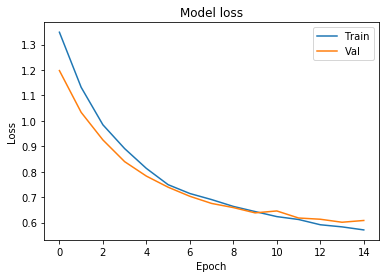

In [21]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

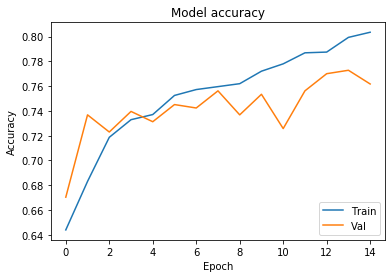

In [22]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Save the model

In [23]:
model_3.save('models/model_NN.h5')

In [24]:
score = model_3.evaluate(X_train, Y_train, verbose=1)

1685/1685 [==============================] - 0s 62us/step


In [25]:
score

[0.5435183005446143, 0.8178041577339172]